In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np


dataset = fetch_openml(data_id=187 , as_frame=True)
df = dataset.frame
df.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   class                           178 non-null    category
 1   Alcohol                         178 non-null    float64 
 2   Malic_acid                      178 non-null    float64 
 3   Ash                             178 non-null    float64 
 4   Alcalinity_of_ash               178 non-null    float64 
 5   Magnesium                       178 non-null    int64   
 6   Total_phenols                   178 non-null    float64 
 7   Flavanoids                      178 non-null    float64 
 8   Nonflavanoid_phenols            178 non-null    float64 
 9   Proanthocyanins                 178 non-null    float64 
 10  Color_intensity                 178 non-null    float64 
 11  Hue                             178 non-null    float64 
 12  OD280%2FOD315_of_dilut

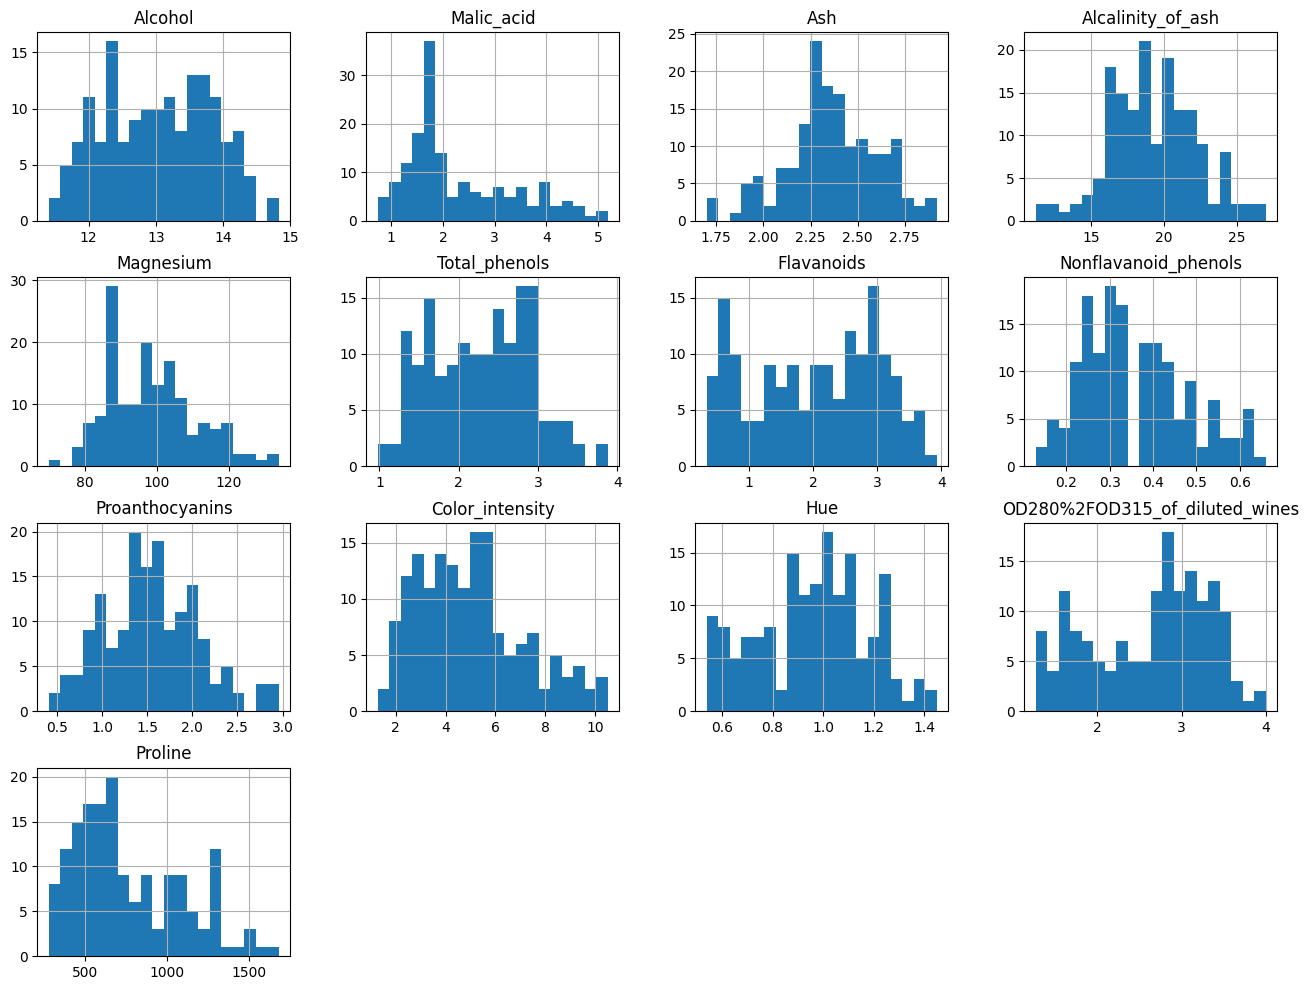

In [4]:
df.hist(bins = 20, figsize=(16, 12));

In [3]:
# حذف اوت لایر ها
features = df.drop(columns='class')

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_mask]


Text(0.5, 1.0, 'Correlation Matrix')

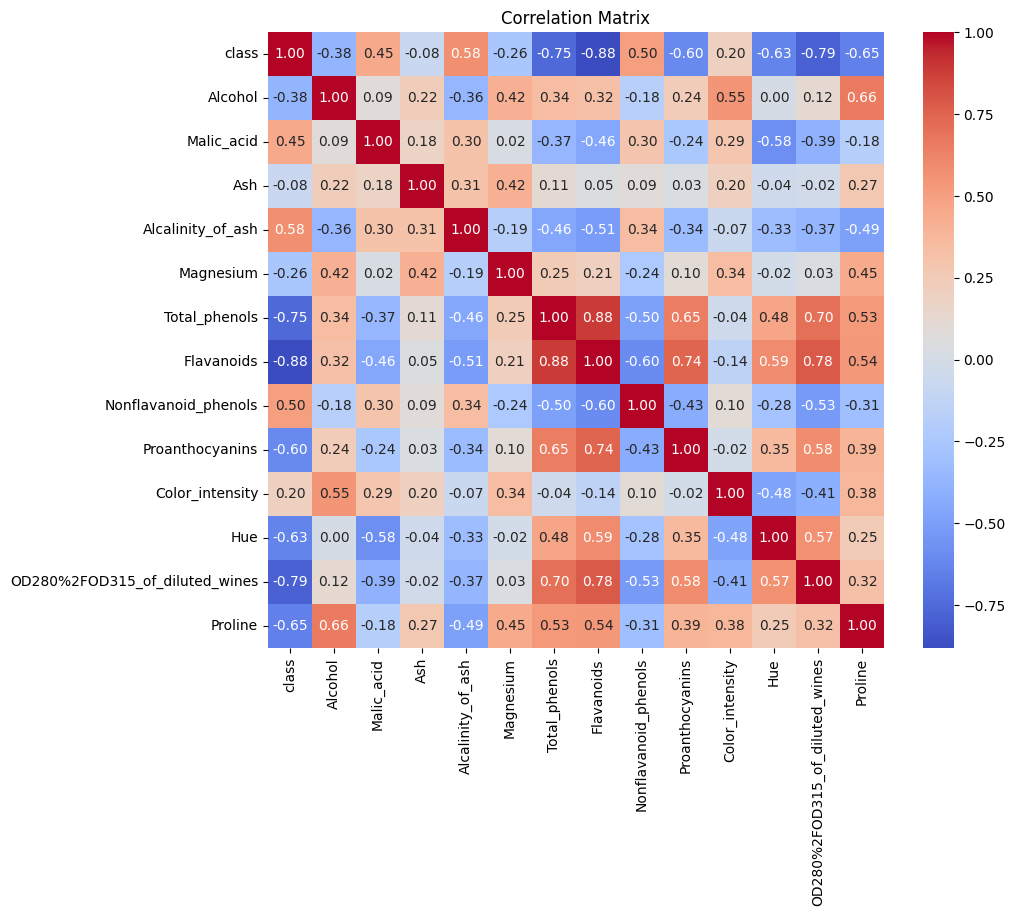

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
corr_matrix = df.corr()

# رسم heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")

In [6]:
df['class'].value_counts(normalize=True)


,proportion
class,
2,0.378882
1,0.360248
3,0.260870


In [7]:
x = df.drop(columns='class')
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2 , random_state=42 , stratify = y)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline ([
    ('clf',DecisionTreeClassifier ())
])

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__criterion' : ['gini' , 'entropy' , 'log_loss'],
    'clf__max_depth' : [None , 3 , 5 ,10 , 15 , 20],
    'clf__min_samples_split' : [2,5,7,10,15],
    'clf__min_samples_leaf' : [1,2,3,4,5],
    'clf__max_features' : [None , 'sqrt' , 'log2'],
    'clf__ccp_alpha' : [0.0 , 0.01,0.05,0.1]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid.fit (x_train , y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__ccp_alpha': [0.0, 0.01, 0.05, 0.1],
                         'clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'clf__max_depth': [None, 3, 5, 10, 15, 20],
                         'clf__max_features': [None, 'sqrt', 'log2'],
                         'clf__min_samples_leaf': [1, 2, 3, 4, 5],
                         'clf__min_samples_split': [2, 5, 7, 10, 15]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [21]:
Best_parameters=grid.best_params_
best_model = grid.best_estimator_
Best_parameters

{'clf__ccp_alpha': 0.0,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10}

In [22]:
y_pred = grid.predict(x_test)
y_proba = grid.predict_proba(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

Text(0.5, 1.0, 'Confusion Matrix')

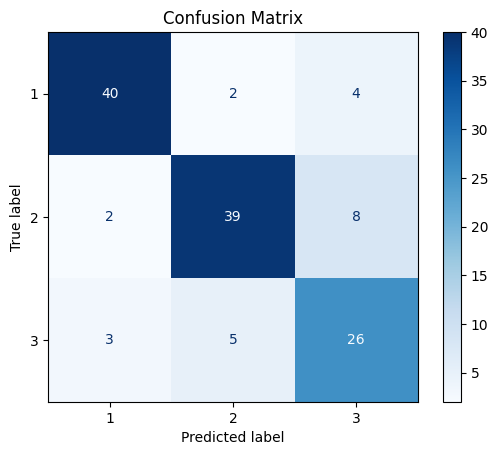

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88        46
           2       0.85      0.80      0.82        49
           3       0.68      0.76      0.72        34

    accuracy                           0.81       129
   macro avg       0.81      0.81      0.81       129
weighted avg       0.82      0.81      0.82       129

ROC AUC Score: 0.8593554522936797


<ipython-input-36-30267064>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


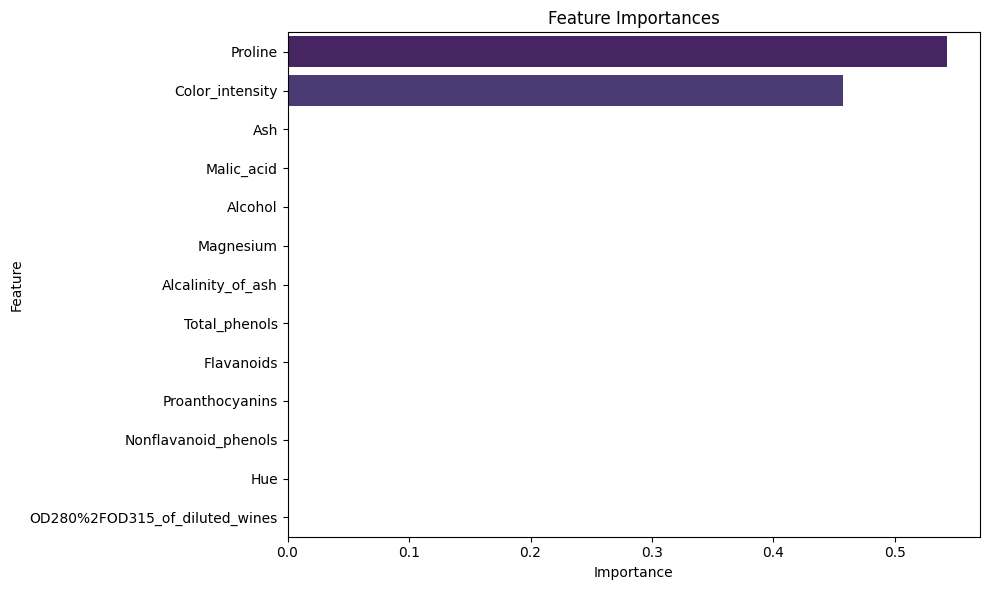

In [36]:
importances = best_model.named_steps['clf'].feature_importances_
feature_names = x_train.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importances')
plt.tight_layout()

Text(0.5, 1.0, 'Decision Tree Structure')

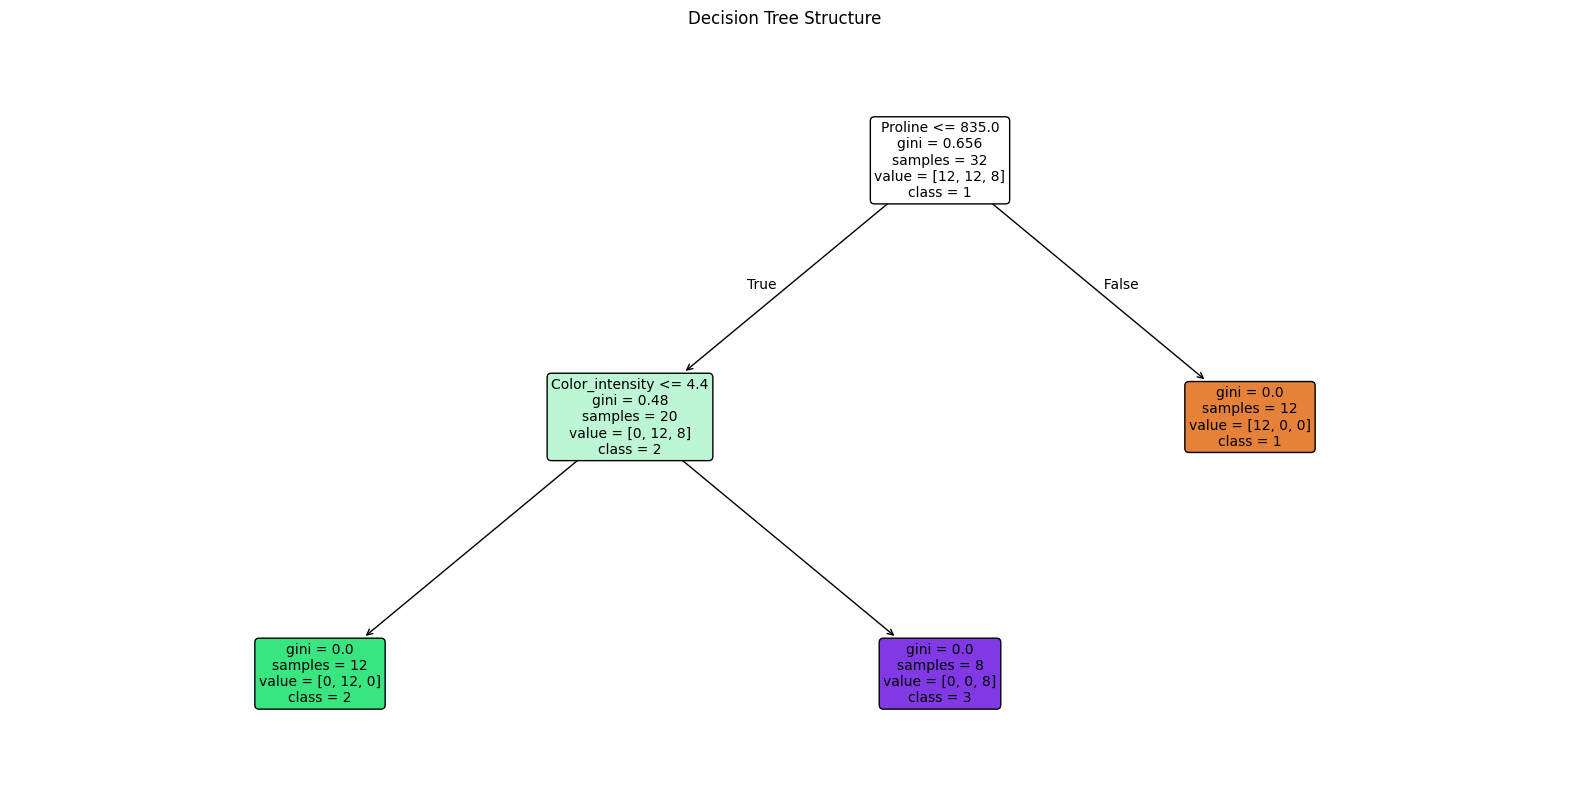

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


dt_model = best_model.named_steps['clf']

# رسم درخت
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=np.unique(y).astype(str), rounded=True, fontsize=10)
plt.title("Decision Tree Structure")



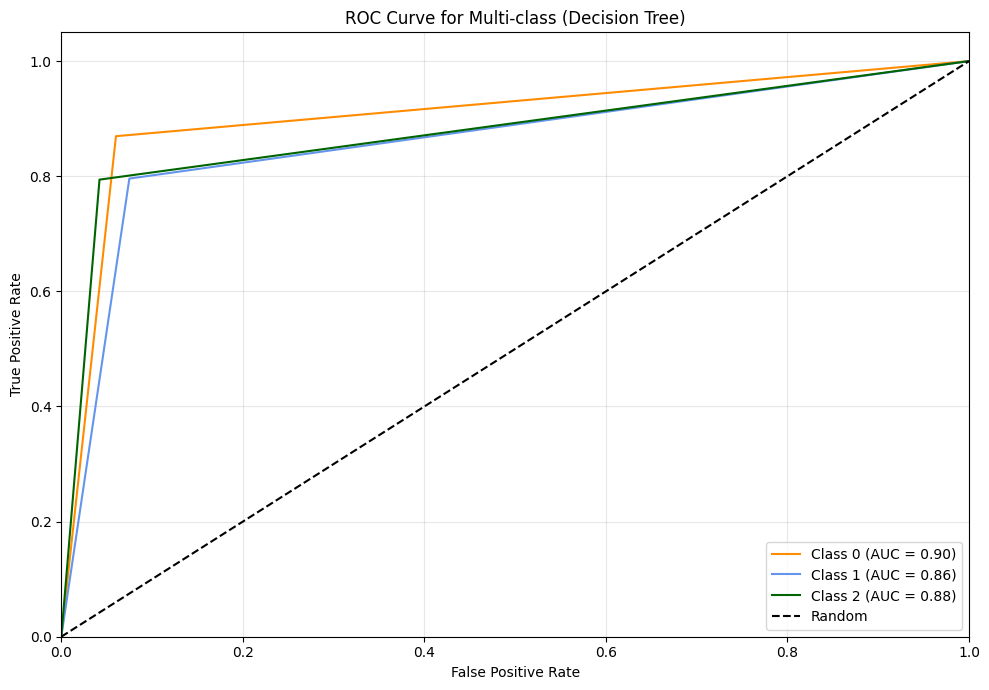

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# باینری‌سازی لیبل‌ها (برای ROC چندکلاسه لازمه)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier(min_samples_split=10, random_state=42)
ovr_clf = OneVsRestClassifier(clf)
ovr_clf.fit(x_train, label_binarize(y_train, classes=np.unique(y)))

# پیش‌بینی احتمال‌ها
y_score = ovr_clf.predict_proba(x_test)

# رسم ROC برای هر کلاس
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم نمودار
plt.figure(figsize=(10, 7))
colors = ['darkorange', 'cornflowerblue', 'darkgreen']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class (Decision Tree)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


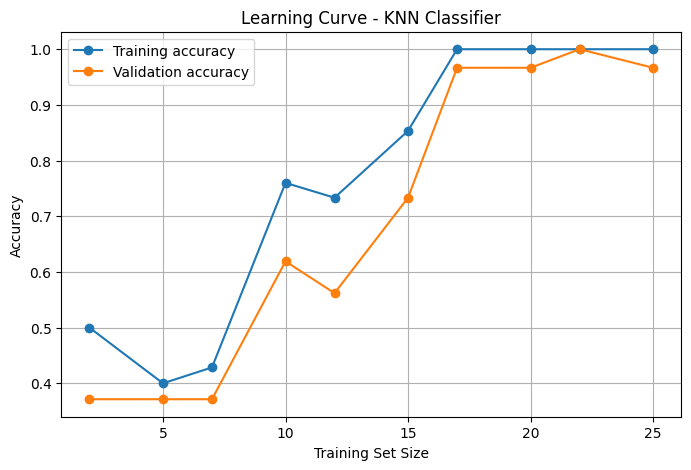

In [41]:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# محاسبه learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid.best_estimator_,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# میانگین امتیازها
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()


In [42]:

from sklearn.metrics import accuracy_score

# پیش‌بینی
y_train_pred = grid.predict(x_train)
y_test_pred = grid.predict(x_test)

# محاسبه دقت
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")


Train Accuracy: 1.000
Test Accuracy : 0.814


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Cross-validation روی کل داده
scores = cross_val_score(dt_model, x, y, cv=5)
print(f"CV mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


[[40  2  4]
 [ 2 39  8]
 [ 3  5 26]]
              precision    recall  f1-score   support

           1       0.89      0.87      0.88        46
           2       0.85      0.80      0.82        49
           3       0.68      0.76      0.72        34

    accuracy                           0.81       129
   macro avg       0.81      0.81      0.81       129
weighted avg       0.82      0.81      0.82       129

CV mean accuracy: 0.901 (+/- 0.076)
